### Analisis de autocorrelaciones para variables mas influyentes

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_excel('gdrive/My Drive/Analitica/Proyecto 1/SeoulBikeData_utf8 limpiado.xlsx') # Remove index_col=0

# 1. Convertir la columna 'Date' al formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

Mounted at /content/gdrive


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,False,False,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,False,False,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,False,False,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,False,False,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,False,False,True


Función para calcular y graficar la función de autocorrelación muestral


In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


In [3]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()

    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

Función para calcular y graficar la función de correlación cruzada muestral

In [4]:
def ccf(x, y, max_lag, ccf_type="correlation", ax=None, **kwargs):
    lags = np.arange(-max_lag, max_lag + 1)

    if ccf_type == "correlation":
        backwards = sm.tsa.ccf(x[::-1], y[::-1], adjusted=False)[max_lag::-1]
        forwards = sm.tsa.ccf(x, y, adjusted=False)[:max_lag + 1]
        ccf = np.r_[backwards[:-1], forwards]
        ylabel = "CCF"
    elif ccf_type == "covariance":
        backwards = sm.tsa.ccovf(x[::-1], y[::-1], adjusted=False)[max_lag::-1]
        forwards = sm.tsa.ccovf(x, y, adjusted=False)[:max_lag + 1]
        ccf = np.r_[backwards[:-1], forwards]
        ylabel = "CCoV"

    if ax is None:
        ax = plt.gca()

    ax.bar(lags, ccf, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    ax.axvline(0, color="black", linestyle="--", linewidth=1)
    if ccf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

**Datos correlación cruzada muestral**

Se realiza una copia del dataframe para no dañar el df que ya tenemos.

In [5]:
datos_nuevos = df.copy()

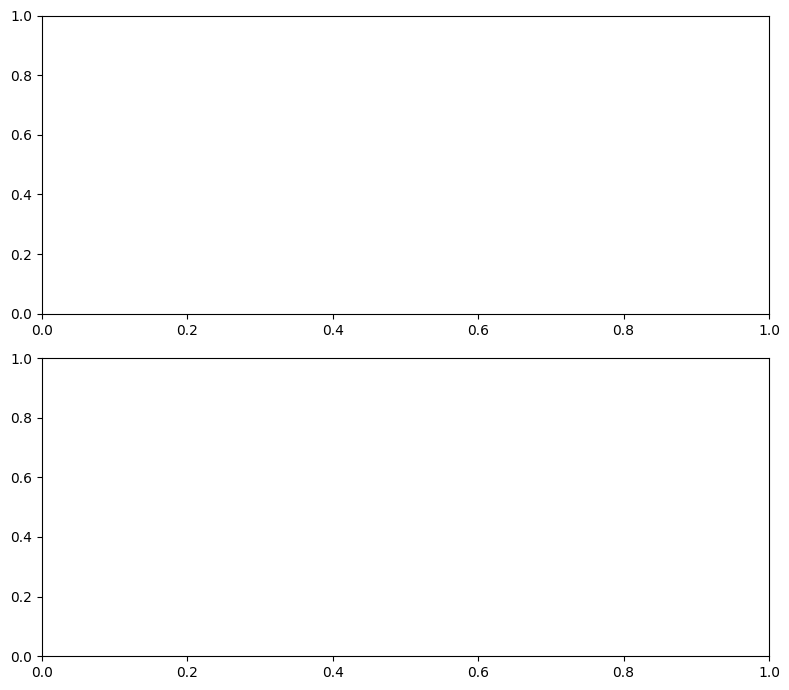

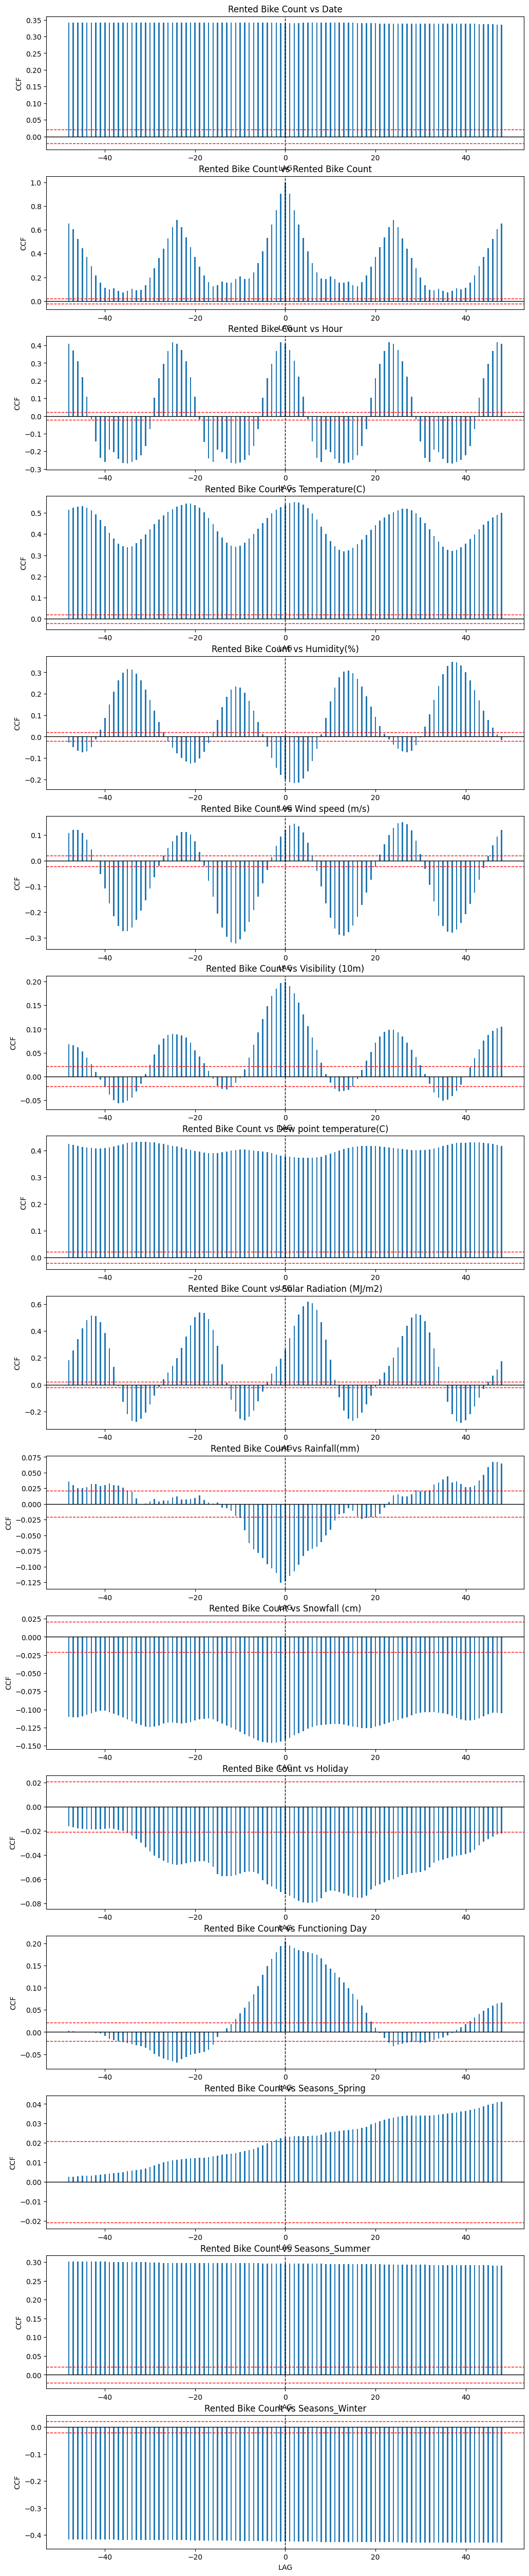

In [7]:
num_var = len(datos_nuevos.columns)
fig, axes = plt.subplots(nrows=2, figsize=(8, 7))

pfig, axes = plt.subplots(nrows=num_var, figsize=(12, num_var *4))

for i, column in enumerate(datos_nuevos.columns):
  ccf( datos_nuevos['Rented Bike Count'],datos_nuevos[column], max_lag=48, ax=axes[i], width=.3)
  axes[i].set_title(f"Rented Bike Count vs {column}")

fig.tight_layout()
plt.show()

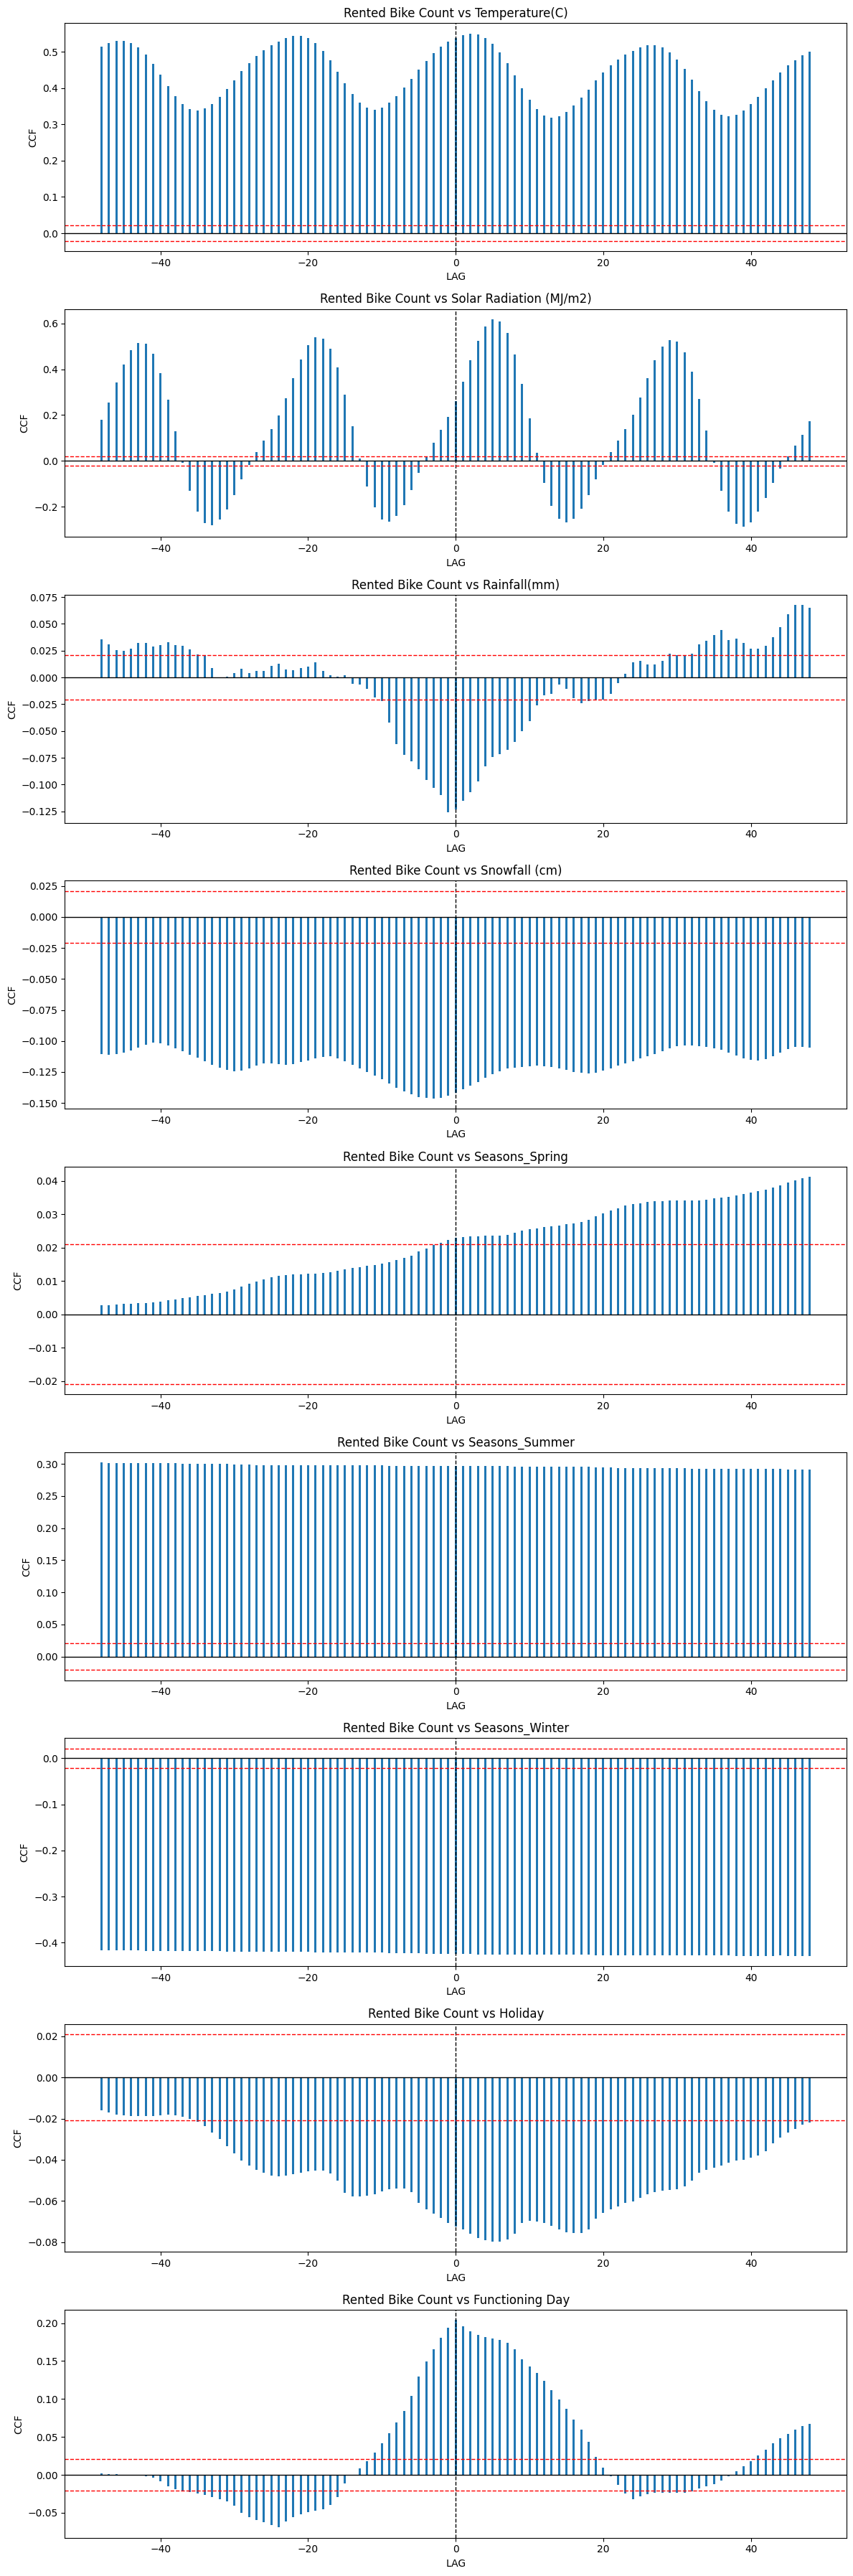

In [9]:
# prompt: hazme ell mismo codigo anterior pero solo comparando las siguientes variables con rented bike: Temperature, Solar Radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Sumer,Seasons_Winter, Holiday y Functioning Day



# **Datos correlación cruzada muestral**
# Se realiza una copia del dataframe para no dañar el df que ya tenemos.
datos_nuevos = df.copy()
selected_columns = ['Temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday', 'Functioning Day']
num_var = len(selected_columns)
fig, axes = plt.subplots(nrows=num_var, figsize=(12, num_var * 4))

for i, column in enumerate(selected_columns):
  ccf( datos_nuevos['Rented Bike Count'],datos_nuevos[column], max_lag=48, ax=axes[i], width=.3)
  axes[i].set_title(f"Rented Bike Count vs {column}")

fig.tight_layout()
plt.show()
